# 🎓 **Taller 4.1: Taller de Medidas de Similitud y Disimilitud**


## OBJETIVOS DEL TALLER:
Comprender y aplicar diferentes medidas de similitud y disimilitud en conjuntos de datos, analizando su comportamiento en distintos contextos de distribución de datos. Implementar y calcular al menos 6 medidas de distancia diferentes:

* ✅Distancia Euclidiana (L2)
* ✅Distancia Manhattan (L1)
* ✅Distancia Chebyshev (L∞)
* ✅Similitud de Coseno
* ✅Distancia de Mahalanobis
* ✅Distancia de Jaccard

Representar gráficamente datasets en espacios bidimensionales

* ✅Visualizar centros y puntos de referencia en gráficos de dispersión
* ✅Interpretar relaciones espaciales a partir de representaciones visuales

# 🔧 **CONFIGURACIÓN INICIAL**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [3]:
import scipy.stats as st

def visualize_dataset(x, y, ds_center, c1, c2):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ds_center_r = [np.mean(x), np.mean(y)]
  print(f'Centro real del cluster: x={ds_center_r[0]:.2f}, y={ds_center_r[1]:.2f}')
  print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
  ax.scatter(ds_center[0], ds_center[1], s=200, c='b')
  # plot candidates
  ax.scatter(c1[0], c1[1], s=200, c='r')
  ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('Kernel Gaussiano 2D')

In [4]:
def visualize_scatter(x, y, ds_center, c1, c2):
  ds_center_real= [np.mean(x), np.mean(y)]
  plt.figure(figsize=(8, 6))  # Tamaño del gráfico
  plt.scatter(x, y, color='blue', alpha=0.6, label='Puntos de datos')
  plt.scatter(ds_center[0], ds_center[1], color='red', marker='X', s=100, label='Centro [2, 2]')
  plt.scatter(ds_center_real[0], ds_center_real[1], color='y', marker='X', s=100, label='Centro Real')
  plt.scatter(c1[0], c1[1], s=200, c='red', label='Candidato 1 (rojo)')
  plt.scatter(c2[0], c2[1], s=200, c='green', marker='v', label='Candidato 2 (verde)')
  plt.xlabel('Variable 1 (data_var_1)')
  plt.ylabel('Variable 2 (data_var_2)')
  plt.title('Dataset 2D con Distribución Normal alrededor de [2, 2]')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend()
  plt.show()

# 📁 **CREAR LOS DATASETS Y GRAFIQUE SUS DISTRIBUCIONES**

In [5]:
# Crear un dataset artificial alrededor de un punto
def cargar_datasetDistNormal(n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generamos los puntox en 2D con funcion normal, al rededor del centro
    data_var_1 = np.random.randn(n_data_points) + ds_center[0]
    data_var_2 = np.random.randn(n_data_points) + ds_center[1]
    return data_var_1, data_var_2

In [6]:
# Crear un dataset artificial alrededor de un punto con una relacion lineal de dependencia entre las variables
def cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generar los datos con una relacion lineal
    data_var_1b = factor[0] * np.random.randn(n_data_points) + ds_center[0]
    data_var_2b = data_var_1b + factor[1] * np.random.randn(n_data_points)
    return data_var_1b, data_var_2b

In [7]:
# Crear un dataset artificial alrededor de un punto con una relacion cuadratica de dependencia entre las variables
def cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]),
                                     n_data_points=50,
                                     rango_x=(-5, 5)):
    #coeficientes : array de 3 elementos [a, b, c]
    #    Coeficientes de la ecuación cuadrática: y = a*x² + b*x + c
    # Para hacer los experimentos reproducibles
    np.random.seed(42)
    # Extraer coeficientes
    a, b, c = coeficientes
    # Generar valores x uniformemente distribuidos
    x = np.random.uniform(rango_x[0], rango_x[1], n_data_points)
    # Aplicar la transformación cuadrática
    y_ideal = a * x**2 + b * x + c
    # Añadir ruido aleatorio (proporcional al rango de y)
    rango_y = np.max(y_ideal) - np.min(y_ideal)
    ruido = 0.1 * rango_y * np.random.randn(n_data_points)
    y = y_ideal + ruido
    return x, y

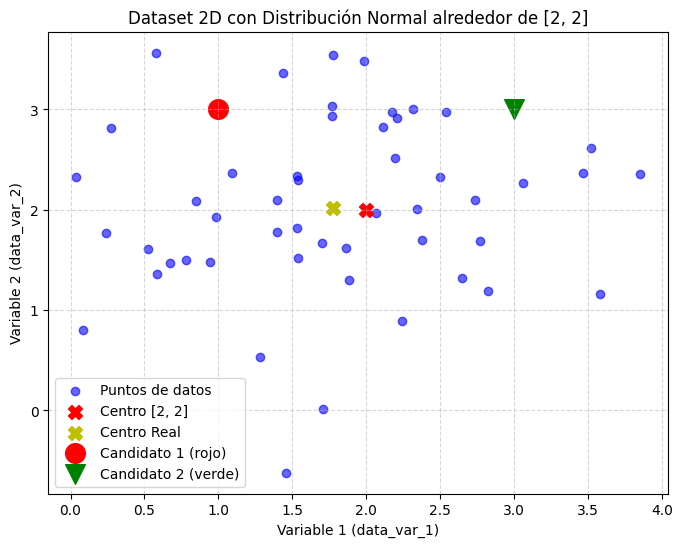

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


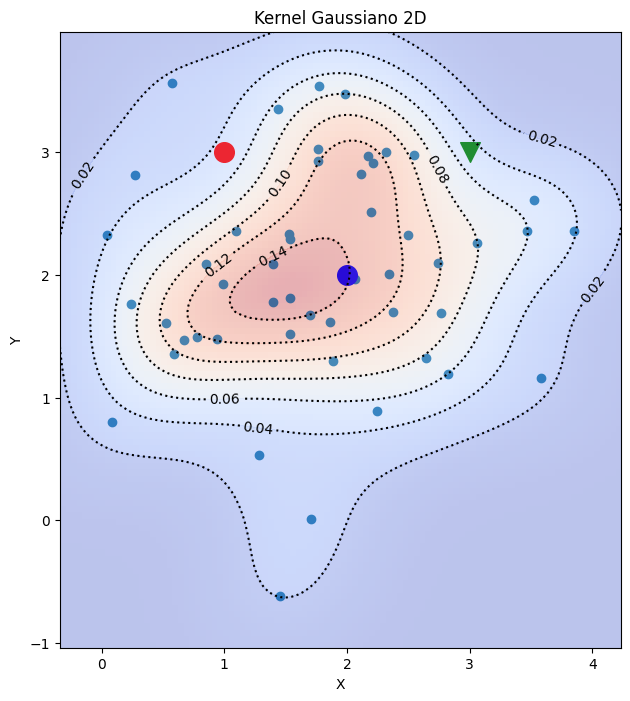

In [8]:
# Cargar dataset
ds_center = np.array([2, 2])
dx, dy =cargar_datasetDistNormal(50, ds_center)
# establecemos nuestros dos puntos candidatos de prueba
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])
visualize_scatter(dx, dy, ds_center, c1, c2)
visualize_dataset(dx, dy, ds_center, c1, c2)

# 🎯 **EJ 1:GRAFIQUE LAS DISTRIBUCIONES DE LOS DATASETS**

In [9]:
# TODO 1.1 crear y vizualizar el dataset con relacion lineal y con relacion cuadratica

# Dataset con relación lineal
dxr = np.linspace(0, 10, 50)
dyr = 3 * dxr + 2 + np.random.normal(0, 2, size=dxr.shape)

# Dataset con relación cuadrática
dx2 = np.linspace(-5, 5, 50)
dy2 = dx2**2 + 2 * dx2 + 1 + np.random.normal(0, 2, size=dx2.shape)


In [11]:
# Dataset grande
dxGrande, dyGrande =cargar_datasetRelacionLineal([20,10], 1000, [50,100])

# 🎯 **EJ 2: IDENTIFIQUE QUE TAN DEPENDIENTES SON LOS DATASETS**

In [12]:
# TODO 2.1 : Use la covarianza para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr}, {dx2, dy2} y {dxGrande, dyGrande}
# su codigo aqui np.cov

print(f'Covarianza dataset con distribución normal:\n')
print(np.cov(dx, dy))

print(f'Covarianza dataset con relación lineal :\n')
print(np.cov(dxr, dyr))

print(f'Covarianza dataset con relación lineal Grande:\n')
print(np.cov(dxGrande, dyGrande))

print(f'Covarianza dataset con relación cuadratica:\n')
print(np.cov(dx2, dy2))



Covarianza dataset con distribución normal:

[[0.87173739 0.08985489]
 [0.08985489 0.76444418]]
Covarianza dataset con relación lineal :

[[ 8.85047897 26.33639916]
 [26.33639916 82.48834329]]
Covarianza dataset con relación lineal Grande:

[[383.54554143 375.65364293]
 [375.65364293 467.25326789]]
Covarianza dataset con relación cuadratica:

[[ 8.85047897 16.77477353]
 [16.77477353 91.5487998 ]]


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?
El dataset que presenta una mayor dependencia lineal entre sus dos variables es el dataset con relación lineal grande (dxGrande, dyGrande). Esto se evidencia porque su covarianza tiene un valor absoluto mayor en comparación con los demás datasets, lo que indica que ambas variables varían conjuntamente de manera más intensa. En contraste, el dataset con distribución normal muestra una covarianza cercana a cero, y el dataset con relación cuadrática puede presentar una covarianza baja a pesar de que existe una relación no lineal entre sus variables.

¿Cual es el problema que tiene la covarianza?

El principal problema de la covarianza es que no está acotada, es decir, no tiene límites fijos que permitan interpretar fácilmente su magnitud. Su valor depende de la escala de las variables, por lo que datasets con diferentes unidades o rangos pueden producir covarianzas muy distintas aunque tengan un grado similar de dependencia. Esto dificulta comparar la fuerza de la relación entre distintos conjuntos de datos. Por esta razón, la covarianza suele complementarse con el coeficiente de correlación de Pearson, que sí está normalizado entre −1 y 1 y facilita su interpretación.

In [13]:
# TODO 2.2: Use el coeficiente de correlación de Pearson para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr} y {dxGrande, dyGrande}
# su codigo aqui np.corrcoef

print(f'Correlación dataset con distribución normal:\n')
print(np.corrcoef(dx, dy))

print(f'Correlación dataset con relación lineal:\n')
print(np.corrcoef(dxr, dyr))

print(f'Correlación dataset con relación lineal Grande:\n')
print(np.corrcoef(dxGrande, dyGrande))


Correlación dataset con distribución normal:

[[1.         0.11007179]
 [0.11007179 1.        ]]
Correlación dataset con relación lineal:

[[1.         0.97471291]
 [0.97471291 1.        ]]
Correlación dataset con relación lineal Grande:

[[1.         0.88736636]
 [0.88736636 1.        ]]


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

El dataset que presenta una mayor dependencia lineal entre sus dos variables es el dataset con relación lineal (dxr, dyr), ya que su coeficiente de correlación de Pearson (≈ 0.98) es el más cercano a 1. Esto indica una relación lineal positiva más fuerte que la observada en el dataset con relación lineal grande, cuyo coeficiente es aproximadamente 0.89.

¿Que medida es mas facil de interpretar para identificar la dependencia entre dos variables de un dataset?

La medida más fácil de interpretar es el coeficiente de correlación de Pearson, porque está acotado entre −1 y 1, lo que permite evaluar claramente tanto la fuerza como la dirección de la relación lineal. En contraste, la covarianza depende de la escala de los datos y no tiene límites definidos, lo que dificulta su interpretación y comparación entre distintos datasets

# 🎯 **EJ 3: CREE LAS FUNCIONES DE LAS MEDIDAS DE DISIMILITUD**

In [14]:
#  TODO 3.1 completar el codigo de las funciones de las siguientes medidas de disimilitud:
#  Distancia Euclidiana, Distancia Manhattan, Distancia Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
#  En scipy.spatial.distance tenemos disponibles las distancias minkowski, mahalanobis, jaccard, hamming, euclidean, cosine, entre otras.
#  En numpy tenemos la norma p =  np.linalg.norm

In [ ]:
def distancia_euclidiana(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord= 1)
   print(f'Distancia euclidiana del punto {p1} al punto {p2} = {dist}')
   return dist

In [15]:
def distancia_manhattan(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord=1)   # ← COMPLETAR
   print(f'Distancia manhattan del punto {p1} al punto {p2} = {dist}')
   return dist

In [16]:
# Distancia Chebyshev
def distancia_chebyshev(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord=np.inf)   # ← COMPLETAR
   print(f'Distancia chebyshev del punto {p1} al punto {p2} = {dist}')
   return dist

# Similitud de Coseno
def similitud_coseno(p1, p2):
   sim = 1 - distance.cosine(p1, p2)   # ← COMPLETAR
   print(f'Similitud de coseno del punto {p1} al punto {p2} = {sim}')
   return sim

# Distancia Mahalanobis
def distancia_mahalanobis(p1, p2, cov_inv):
   dist = distance.mahalanobis(p1, p2, cov_inv)   # ← COMPLETAR
   print(f'Distancia mahalanobis del punto {p1} al punto {p2} = {dist}')
   return dist

# Distancia Jaccard
def distancia_jaccard(p1, p2):
   dist = distance.jaccard(p1, p2)   # ← COMPLETAR
   print(f'Distancia jaccard del punto {p1} al punto {p2} = {dist}')
   return dist


In [17]:
# Ejecutar funciones
print("🔍 calculando las distancias de los puntos candidatos al centro")

print('Distancias primer dataset:\n')
ds_center = np.array([np.mean(dx), np.mean(dy)])   # ← COMPLETAR, calcule el centro del primer dataset

dist_euc1 = distancia_euclidiana(c1, ds_center)
dist_euc2 = distancia_euclidiana(c2, ds_center)

dist_man1 = distancia_manhattan(c1, ds_center)     # ← COMPLETAR
dist_man2 = distancia_manhattan(c2, ds_center)

dist_cheb1 = distancia_chebyshev(c1, ds_center)    # ← COMPLETAR
dist_cheb2 = distancia_chebyshev(c2, ds_center)

print('Distancias segundo dataset:\n')
ds_center = np.array([np.mean(dxr), np.mean(dyr)])  # ← COMPLETAR, calcule el centro del segundo dataset

dist_euc1 = distancia_euclidiana(c1, ds_center)
dist_euc2 = distancia_euclidiana(c2, ds_center)

dist_man1 = distancia_manhattan(c1, ds_center)     # ← COMPLETAR
dist_man2 = distancia_manhattan(c2, ds_center)

dist_cheb1 = distancia_chebyshev(c1, ds_center)    # ← COMPLETAR
dist_cheb2 = distancia_chebyshev(c2, ds_center)

print('Distancias dataset grande:\n')
ds_center = np.array([np.mean(dxGrande), np.mean(dyGrande)])  # ← COMPLETAR para el resto de datasets

dist_euc1 = distancia_euclidiana(c1, ds_center)
dist_euc2 = distancia_euclidiana(c2, ds_center)

dist_man1 = distancia_manhattan(c1, ds_center)     # ← COMPLETAR
dist_man2 = distancia_manhattan(c2, ds_center)

dist_cheb1 = distancia_chebyshev(c1, ds_center)    # ← COMPLETAR
dist_cheb2 = distancia_chebyshev(c2, ds_center)


🔍 calculando las distancias de los puntos candidatos al centro
Distancias primer dataset:

Distancia manhattan del punto [1 3] al punto [1.77452609 2.01778087] = 1.7567452242759072
Distancia manhattan del punto [3 3] al punto [1.77452609 2.01778087] = 2.207693034788188
Distancia chebyshev del punto [1 3] al punto [1.77452609 2.01778087] = 0.9822191295320475
Distancia chebyshev del punto [3 3] al punto [1.77452609 2.01778087] = 1.2254739052561403
Distancias segundo dataset:

Distancia manhattan del punto [1 3] al punto [ 5.         16.92142487] = 17.921424866661155
Distancia manhattan del punto [3 3] al punto [ 5.         16.92142487] = 15.921424866661155
Distancia chebyshev del punto [1 3] al punto [ 5.         16.92142487] = 13.921424866661155
Distancia chebyshev del punto [3 3] al punto [ 5.         16.92142487] = 13.921424866661155
Distancias dataset grande:

Distancia manhattan del punto [1 3] al punto [50.38664112 51.09500349] = 97.48164460538459
Distancia manhattan del punto [3 3

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué medidas de disimilitud son de un punto a otro punto?
Las medidas de disimilitud de un punto a otro punto son:

Distancia Euclidiana

Distancia Manhattan

Distancia Chebyshev

Distancia de Jaccard (cuando se aplica a vectores binarios)

Estas medidas calculan directamente la separación entre dos puntos en el espacio de características utilizando únicamente sus coordenadas, sin considerar la distribución global de los datos.

¿Qué medidas de disimilitud son de un punto a una distribución?

Las distancias Euclidiana, Manhattan y Chebyshev son medidas de disimilitud entre un punto y otro punto, ya que calculan la separación directa en el espacio considerando únicamente las coordenadas de ambos puntos, sin tener en cuenta cómo están distribuidos los datos en el dataset.

Por otro lado, la distancia de Mahalanobis es una medida de disimilitud de un punto respecto a una distribución, ya que utiliza la matriz de covarianza del conjunto de datos. Esto le permite considerar la variabilidad y la correlación entre las variables, evaluando qué tan lejos se encuentra un punto con respecto al comportamiento global de la distribución.

¿La distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos?

Sí, la distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos, ya que incorpora la matriz de covarianza en su cálculo. Esto permite que la distancia se ajuste a la forma, escala y correlación de las variables del dataset, diferenciando adecuadamente entre direcciones con mayor o menor variabilidad. A diferencia de las distancias clásicas, Mahalanobis no mide únicamente la separación geométrica, sino la separación estadística respecto a la distribución de los datos.

# 🔄 **EJ 4: MATRIZ DE DISTANCIAS**

Cree un metodo que sea capaz de calcular la matriz de distancias de todos los puntos de un dataset, recive como parametros la medida de disimilitud y en algunos casos la matriz de covarianza

In [18]:
import itertools as it
def matriz_distancias(X, distancia, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))
    for pair in it.product(np.arange(n_samples), repeat=2):
        if mC is not None:
            mD[pair] = distancia(X[pair[0]], X[pair[1]], mC)   # Complete
        else:
            mD[pair] = distancia(X[pair[0]], X[pair[1]])       # Complete
    return mD


Matriz distancias Euclidiana:
 [[0.         0.95190042 1.01232713 ... 0.56394133 0.35380861 2.32778928]
 [0.95190042 0.         0.83838672 ... 1.35883873 0.62005124 1.63173079]
 [1.01232713 0.83838672 0.         ... 1.02344385 0.746747   2.45097388]
 ...
 [0.56394133 1.35883873 1.02344385 ... 0.         0.75801984 2.86338563]
 [0.35380861 0.62005124 0.746747   ... 0.75801984 0.         2.12025144]
 [2.32778928 1.63173079 2.45097388 ... 2.86338563 2.12025144 0.        ]]
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 0.9038022603865778
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 0.8710303356600121
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.017099681077626
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 0.86880370

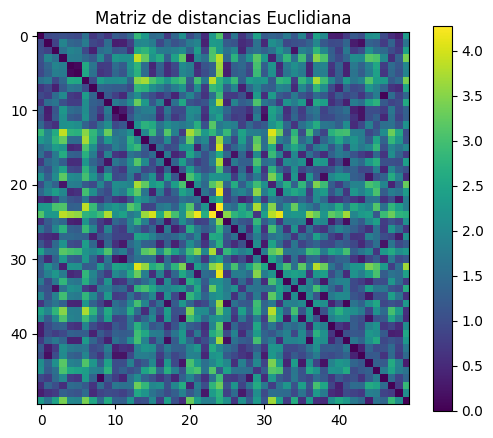

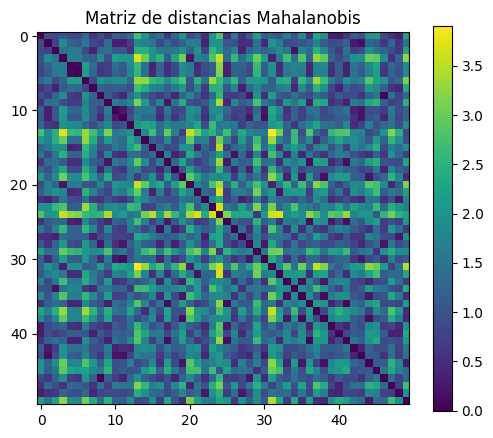

In [20]:
# ← COMPLETAR calcule y grafique la matriz de distancias para todos los datasets
# usamos distancia euclidiana y mahalanobis

# Define X from one of the existing datasets, for example dx and dy
X = np.column_stack((dx, dy))

# calculamos primero la matriz de covarianzas
mC = np.cov(X.T)   # ← COMPLETAR

# Matriz de distancias Euclidiana
Ma_euclidiana = matriz_distancias(X, distancia_euclidiana)
print('Matriz distancias Euclidiana:\n', Ma_euclidiana)

# Matriz de distancias Mahalanobis
Ma_mahalanobis = matriz_distancias(X, distancia_mahalanobis, mC)
print('Matriz distancias Mahalanobis:\n', Ma_mahalanobis)

# Graficamos las matrices
plt.figure(figsize=(6, 5))
plt.imshow(Ma_euclidiana)
plt.title('Matriz de distancias Euclidiana')
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 5))
plt.imshow(Ma_mahalanobis)
plt.title('Matriz de distancias Mahalanobis')
plt.colorbar()
plt.show()


Text(0.5, 1.0, 'Mahalanobis')

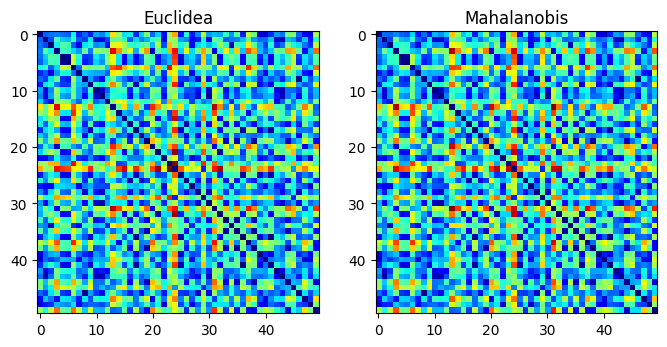

In [22]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Ma_euclidiana, cmap='jet')
ax[0].set_title('Euclidea')
ax[1].imshow(Ma_mahalanobis, cmap='jet')
ax[1].set_title('Mahalanobis')

In [24]:
#Hasta ahora hemos visto todo disimilitudes (distancias). ¿Y si quisiéramos una medida de similitud?
def matriz_similitud(X, distancia, mC=None):
    # Calculamos primero la matriz de distancias
    if mC is not None:
        mD = matriz_distancias(X, distancia, mC)
    else:
        mD = matriz_distancias(X, distancia)

    # Convertimos distancias en similitudes
    mS = 1 / (1 + mD)

    return mS



Matriz de Similitud Euclidiana:
 [[1.         0.51232122 0.4969371  ... 0.63941017 0.73865685 0.3004998 ]
 [0.51232122 1.         0.54395519 ... 0.42393742 0.61726443 0.37997808]
 [0.4969371  0.54395519 1.         ... 0.49420694 0.57249275 0.28977327]
 ...
 [0.63941017 0.42393742 0.49420694 ... 1.         0.56882179 0.25884033]
 [0.73865685 0.61726443 0.57249275 ... 0.56882179 1.         0.32048699]
 [0.3004998  0.37997808 0.28977327 ... 0.25884033 0.32048699 1.        ]]
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 0.9038022603865778
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 0.8710303356600121
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.017099681077626
Distancia mahalanobis del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 0.868803

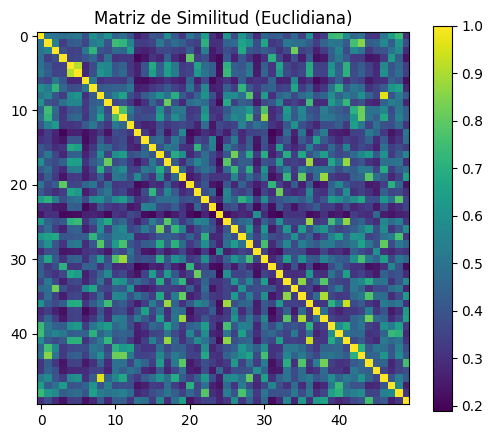

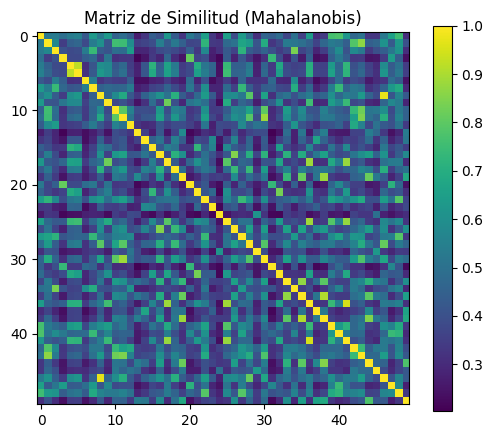

In [26]:
# Complete 4.3 Grafique la matriz de similitud


Ms_euclidiana = matriz_similitud(X, distancia_euclidiana)
print('Matriz de Similitud Euclidiana:\n', Ms_euclidiana)

Ms_mahalanobis = matriz_similitud(X, distancia_mahalanobis, mC)
print('Matriz de Similitud Mahalanobis:\n', Ms_mahalanobis)

plt.figure(figsize=(6, 5))
plt.imshow(Ms_euclidiana)
plt.title('Matriz de Similitud (Euclidiana)')
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 5))
plt.imshow(Ms_mahalanobis)
plt.title('Matriz de Similitud (Mahalanobis)')
plt.colorbar()
plt.show()

# ✅ **RESULTADOS:**
¿Cual grafico es mas facil de interpretar: el de una medida de disimilitud o de similitud?

El gráfico de la medida de similitud es más fácil de interpretar que el de una medida de disimilitud. Esto se debe a que los valores de similitud están acotados entre 0 y 1, donde valores cercanos a 1 indican alta semejanza entre los puntos y valores cercanos a 0 indican baja semejanza, lo cual resulta más intuitivo para el análisis visual.



# 🚀 ¡TALLER FINALIZADO!"